# Factors that influence to the SAT results of public schools in New York.

![SAT_test](SAT_test.jpeg)

## <a id='top_1'></a> <a id='table_of_content'></a>[Table of Content](#table_of_content)
 - [Introduction](#1)
 - [Background Research](#2)
 - [Goals of the project](#3)
 - [Read in the data](#4)
 - [Exploring the data](#5)
 - [Read in the surveys](#6)
 - [Cleaning Up](#7)
   - [Add DBN columns](#8)
   - [Convert columns to numeric](#9)
   - [Parsing Geographic Coordinates for Schools](#10)
   - [Condense datasets](#11)
   - [Convert AP scores to numeric](#12)
   - [Combine the datasets](#13)
   - [Add a school district column for mapping](#14)
 - [Data Analysis and Visualization](#15)
   - [Find correlations](#16)
   - [Plotting survey correlations](#17)
   - [Exploring Safety and SAT Scores](#18)
   - [Exploring Race and SAT Scores](#19)
   - [English learners by Districts](#20)
   - [Exploring Gender and SAT Scores](#21)
 - [Conclusion](#22)

## <a id='1'></a>Introduction

This analysis aims to explore the relationships between SAT scores and various demographic factors in New York City public schools. As a brief background, the SAT, or Scholastic Aptitude Test, is a standardized test taken by high school seniors in the U.S., and colleges often use it as a criterion for admissions. Higher average SAT scores are typically associated with better-performing schools.

To conduct this study, we will merge and analyze multiple datasets containing student SAT scores and additional demographic information for each public high school in New York. By combining these datasets, we hope to gain valuable insights into the potential factors that may impact the average SAT scores in these schools and gain a comprehensive understanding of the educational landscape in the city.

Below are the links to all the datasets used in this project:

 - [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
 - [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each school in New York City
 - [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
 - [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
 - [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated, and other outcome information
 - [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
 - [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school
 
 All of these datasets are interrelated. We'll need to combine them into a single dataset before we can find correlations.


## <a id='2'></a>Background Research

Based on the background research, the following conclusions have been drawn:
  - The SAT is taken only by high school students; thus, the analysis will focus exclusively on high schools.
  - New York City comprises five distinct boroughs, each representing separate regions.
  - Schools in New York City are organized into various school districts, with each district containing multiple schools.
  - The datasets encompass different types of schools, necessitating data cleaning to isolate high schools for analysis.
  - Each school in New York City is identified by a unique code called a DBN (district borough number).
  - Aggregating data by district allows for the utilization of district mapping data to visualize differences between districts on a district-by-district basis.

## <a id='3'></a> Goals of the project

 High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

The objectives of the project include:

 - Investigating the potential correlation between AP exam scores and SAT scores among high schools.
 - Analyzing the equity aspect of the SAT by examining correlations between demographic factors such as race, gender, safety level, percentage of English learners, class size, and SAT scores.

In [1]:
# Importing libraries
import pandas as pd
import numpy
import re
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## <a id='4'></a>Read in the data

In [2]:
# Reading each file into a pandas dataframe and then store all of the dataframes in a dictionary.
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}    
for file in data_files:
    readed = pd.read_csv('/schools/{0}'.format(file))
    key_name = file.replace(".csv", "")
    data[key_name] = readed

## <a id='5'></a>Exporing the data

In [3]:
for key, value in data.items() :
    print('The name of the dataframe is ' + key)
    print(value[:6])
    print('\n')

The name of the dataframe is ap_2010
      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   
5  02M298                       Pace High School              21   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
5                21                                    s  


The name of the dataframe is class_size
   CSD BOROUGH SCHOOL CODE     

In [4]:
for d in data:
    print('The name of the dataframe is ' + d)
    print('\n')
    print(data[d].info())
    print('\n')

The name of the dataframe is ap_2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   DBN                                   258 non-null    object
 1   SchoolName                            258 non-null    object
 2   AP Test Takers                        258 non-null    object
 3   Total Exams Taken                     258 non-null    object
 4   Number of Exams with scores 3 4 or 5  258 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB
None


The name of the dataframe is class_size


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int

Based on the initial observations of the first few rows in each dataframe, the following points can be deduced:

  - Each dataset seems to possess a DBN column, which is unique for each school, or relevant information that can be used to generate one. This indicates the possibility of utilizing the DBN column to combine the datasets. Initially, matching rows from different datasets can be identified by seeking identical DBNs. Subsequently, all columns corresponding to these DBNs can be consolidated into a unified dataset.

  - Certain datasets appear to contain multiple entries for each school, resulting from duplicate DBN values within the rows. Consequently, preprocessing becomes necessary to ensure the uniqueness of each DBN within its respective dataset. This preprocessing step is crucial to prevent issues during dataset combination. Failing to address this might lead to merging multiple rows from one dataset with a single row from another dataset.
    
  - Certain datasets, such as 'class_size' and 'hs_directory', lack a column labeled 'DBN'. However, in the case of 'hs_directory', a similar column is present under the name 'dbn', making it a straightforward renaming task.

  - In the 'sat_results' data, the 'DBN' is formed by combining values from the 'CSD' and 'SCHOOL CODE' columns in the 'class_size' data. One distinction is that the 'DBN' is formatted to ensure the 'CSD' section always consists of two digits. As a result, we need to append a leading zero to the 'CSD' if it contains fewer than two digits.
    
  -  It might be beneficial to merge the three columns containing SAT scores—namely SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score—into a unified column. This consolidation would enhance the simplicity of score analysis. However, as a preliminary step, it's imperative to transform these columns from their current object (string) data type to a numeric data type.


## <a id='6'></a>Read in the surveys

In [5]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("/schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head(5)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### [to the Table of Content](#table_of_content)

## <a id='7'></a>Cleaning Up
Upon initial examination of the data, two key observations become apparent:

 - The dataset contains a substantial number of columns, exceeding 2000, the majority of which are irrelevant for our analysis. To streamline our efforts and facilitate the identification of correlations, it becomes essential to pare down the dataset by filtering out unnecessary columns. This process not only aids in the printing of the dataframe but also aids in uncovering relevant relationships. Referencing the data dictionary available [at the original data source](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)  assists in pinpointing the columns of interest. Armed with our understanding of the problem and the intended analysis, we can leverage the data dictionary to ascertain which columns warrant inclusion.

 - The survey data includes a column labeled 'dbn', which we should transform to uppercase ('DBN'). This modification serves to establish uniformity across column names, ensuring consistency and harmonizing the column label with other datasets.

In [6]:
# Referring to the data dictionary, the following columns are of significance. 
# They gives aggregate survey data about how parents, 
# teachers, and students feel about school safety, academic performance, and more.

survey_fields = [
    "dbn", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11"
]
survey = survey.loc[:,survey_fields].copy()

survey.rename(columns={"dbn": "DBN"}, inplace=True)
data["survey"] = survey

In [7]:
data["survey"]

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,75X352,90.0,58,48,38.0,46.0,160.0,8.9,8.3,7.9,...,5.7,5.8,6.8,6.0,7.8,7.6,7.4,6.6,7.1,7.2
52,75X721,84.0,90,48,237.0,82.0,239.0,8.6,7.6,7.5,...,6.7,7.0,7.8,7.2,7.8,7.9,8.0,7.1,7.3,7.6
53,75X723,77.0,74,20,103.0,69.0,74.0,8.4,7.8,7.8,...,6.7,7.6,6.7,7.2,7.7,7.7,7.6,7.4,7.4,7.7
54,75X754,63.0,93,22,336.0,82.0,124.0,8.3,7.5,7.5,...,6.6,7.1,6.8,6.6,7.6,7.7,7.2,6.9,7.3,7.5


### <a id='8'></a>Add DBN columns

We can make a few observations based on this output:

The DBN appears to be a unique ID for each school. 
We can tell from the first few rows of names that we only have data about high schools.
There's only a single row for each high school, so each DBN is unique in the SAT data.
We may eventually want to combine the three columns that contain SAT scores, which are SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score, into a single column to make the scores easier to analyze.

Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets. First we'll pinpoint matching rows from different datasets by looking for identical DBNs, then group all of their columns together in a single dataset.

In [8]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [9]:
# Copying the dbn column in 'hs_directory' into a new column called DBN
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# Custom function that adds 0 if necessary
def padded_csd(num):
    # Takes in a number and converts it to a string
        new_num = str(num)
    # Checks the length of the string
        if len(new_num) == 2:
            return new_num
        else:
            return new_num.zfill(2)

# Creating a new column called padded_csd in the class_size dataset.
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(padded_csd)

# Assigning the result to the DBN column
data["class_size"]["DBN"] =  data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]   

print(data["class_size"]["DBN"].head(5))

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object


### <a id='9'></a>Convert columns to numeric


In [10]:
# Convert columns to numeric type
# Using errors=’coerce’ will replace all non-numeric values with NaN

def SAT_col_convert(col):
    new_col = pd.to_numeric(col,errors="coerce")
    return new_col
    
l = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for each in l:
    data["sat_results"][each] = data["sat_results"][each].apply(SAT_col_convert)

data["sat_results"]["sat_score"] = data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]
print(data["sat_results"]["sat_score"].head(5))

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


### <a id='10'></a>Parsing Geographic Coordinates for Schools

It's essential to extract and interpret the latitude and longitude coordinates for each school. This step is pivotal in visualizing and identifying potential geographic trends within the data. Currently, the coordinates are embedded within the text field 'Location 1' within the 'hs_directory' dataset. Our aim is to dissect this information, isolating both latitude and longitude components. Together, latitude and longitude constitute a coordinated pair that serves as a geographical marker, facilitating precise identification of specific locations across the Earth's surface.

In [11]:
# Making functions to parse the latitude and the longitude
def extract_latitude(lat_info):
    coords_info = re.findall("\(.+\)", lat_info)
    latitude = coords_info[0].split(",")[0].replace("(", "")
    return latitude

def extract_longitude(long_info):
    coords_info = re.findall("\(.+\)",long_info)
    longitude = coords_info[0].split(",")[1].replace(")", "").strip()
    return longitude

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(extract_latitude)
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(extract_longitude)

# Convert them to numeric values
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

print(data['hs_directory']['lon'].head(5))
print('\n')
print(data['hs_directory']['lat'].head(5))

0   -73.961648
1   -73.904475
2   -73.916162
3   -74.000807
4   -73.806500
Name: lon, dtype: float64


0    40.670299
1    40.827603
2    40.842414
3    40.710679
4    40.718810
Name: lat, dtype: float64


### <a id='11'></a>Condense datasets

Our focus is exclusively on grades 9 through 12 for the year 2012 the most recent year of data, and also match our SAT results data..
Each school has the potential to offer multiple program types. By examining the distinct values within the "PROGRAM TYPE" category, it becomes evident that "GEN ED" stands out as the predominant category. In light of this, we will narrow our focus exclusively to rows where the "PROGRAM TYPE" is designated as "GEN ED".

Given the variations in columns, it appears that certain subjects are represented. Our objective is to ensure that our 'class_size' data encompasses all classes provided by a school, rather than a limited subset. To achieve this, we can calculate the average across all the classes offered by each school. This gives us unique DBN values, while also incorporating as much data as possible into the average.

To condense the 'graduation' dataset, our approach involves selecting data from the latest available cohort, which is represented by the year 2006. Additionally, our focus is on the entire cohort, and as such, we will exclusively choose rows where the demographic category is designated as "Total Cohort."

In [12]:
# Filtering class_size so the GRADE  and PROGRAM TYPE column only contain the value  09-12 and GEN ED respectively
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

# Computing average class sizes
class_size = class_size.groupby("DBN").mean(numeric_only=True)
class_size.reset_index(inplace=True)
data.update({"class_size": class_size})

# # Our intention is to exclusively extract rows where the 'schoolyear' corresponds to 2012
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

### <a id='12'></a>Convert AP scores to numeric

Before submitting college applications, high school students participate in Advanced Placement (AP) exams, which cover various school subjects. Achieving commendable scores on these exams could result in college credit. To proceed, we need to transform the AP test scores within the 'ap_2010' dataset from string format to numerical values. This conversion specifically applies to three columns: 'AP Test Takers,' 'Total Exams Taken,' and 'Number of Exams with scores 3, 4, or 5.'

In [13]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

### <a id='13'></a>Combine the datasets

We will utilize the DBN column to establish correspondences between rows in various datasets. In order to retain the maximum number of rows from the datasets while reducing the occurrence of null values, we may have to implement distinct merge strategies for different datasets. For instance, considering that certain datasets contain a significant number of absent DBN values, a left join becomes a more suitable approach.
To mitigate the issue of missing data within columns, an inner join will be implemented. This approach ensures that only rows containing complete information will be retained.

In [14]:
combined = data["sat_results"]

# Both the ap_2010 and the graduation datasets have many missing DBN values, 
# our strategy involves employing a left join during the merging process with the 'sat_results' dataset.
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,32K545,EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK,88,384.0,409.0,361.0,1154.0,EBC-HS FOR PUB SERVICE (BUSH),47.0,64.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1155 Dekalb Avenue\nBrooklyn, NY 11221\n(40.69...",40.694482,-73.929154
359,32K549,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,75,348.0,353.0,334.0,1035.0,NaN,NaN,NaN,...,Then to District 32 students or residents,Then to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",40.696962,-73.910816
360,32K552,ACADEMY OF URBAN PLANNING,67,342.0,364.0,354.0,1060.0,Academy of Urban Planning,76.0,100.0,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"400 Irving Avenue\nBrooklyn, NY 11237\n(40.696...",40.696962,-73.910816
361,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,39,428.0,465.0,422.0,1315.0,All City Leadership Secondary School,7.0,8.0,...,Then to New York City residents who attend an ...,"Then to Districts 24, 30 and 32 students or re...",Then to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,"321 Palmetto Street\nBrooklyn, NY 11237\n(40.6...",40.697408,-73.913153


In [15]:
# Counting NaN values
nan_count = combined.isna().sum()
print(nan_count )

DBN                                  0
SCHOOL NAME                          0
Num of SAT Test Takers               0
SAT Critical Reading Avg. Score     28
SAT Math Avg. Score                 28
                                  ... 
priority09                         363
priority10                         363
Location 1                           0
lat                                  0
lon                                  0
Length: 159, dtype: int64


Based on the observations, a notable presence of columns containing null (NaN) values is apparent.  This outcome is a result of our decision to execute left joins, which might have led to certain columns lacking data. Furthermore, the dataset initially had some inherent missing values. 
Had we opted for a different approach, such as not performing a left join, numerous rows with missing data would have been omitted during the merging process. This scenario would have significantly reduced the count of high schools in our dataset.
To address the issue of missing data, our strategy involves filling in the gaps by utilizing the overall mean for each respective column. This approach enables us to rectify the missing values and maintain the dataset's integrity and comprehensiveness.

In [16]:
# Filling any missing values with the means
combined = combined.fillna(combined.mean(numeric_only=True))

# Filling any remaining missing values with 0 
combined = combined.fillna(0)

### <a id='14'></a>Add a school district column for mapping

In [17]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

Our journey to uncover possible relationships between SAT scores and demographic factors began with the acquisition of diverse datasets containing information about public schools in New York City. After meticulously cleaning these datasets, we merged them into a cohesive dataset named "combined." Armed with this comprehensive dataset, we are now ready to delve into the phase of analyzing and visually representing our findings as part of our investigation.

###### [to the Table of Content](#table_of_content)

## <a id='15'></a>Data Analysis and Visualization

### <a id='16'></a>Find correlations

Correlations provide insight into the degree of association between two columns. We will be utilizing the "r" value, commonly known as Pearson's correlation coefficient. This metric quantifies the extent of correlation between two sets of numerical data, offering a measure of their closeness.

In [18]:
# Finding all possible correlations
correlations = combined.corr(method='pearson',numeric_only = True)

### <a id='17'></a>Plotting survey correlations

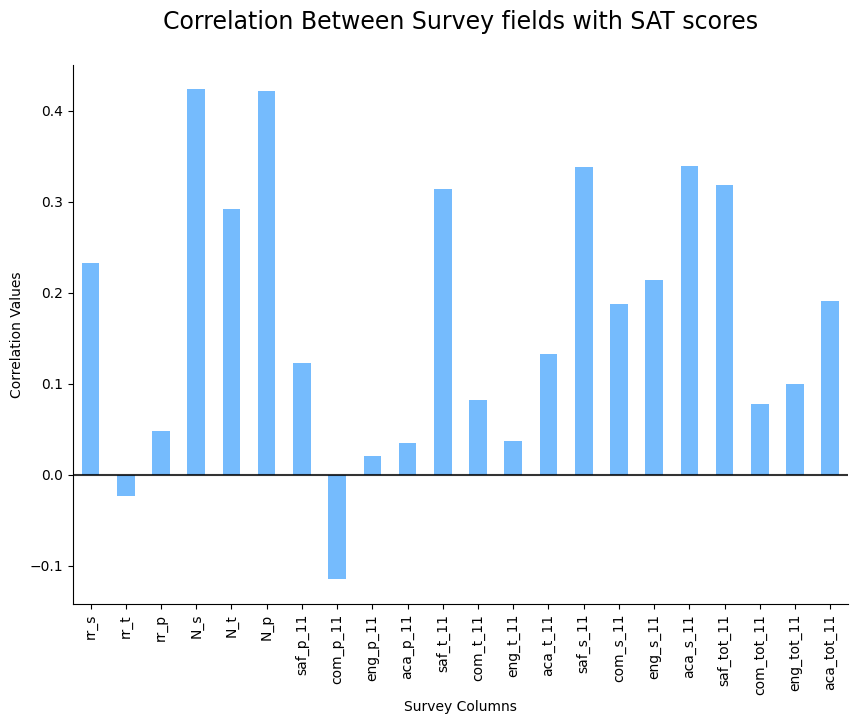

In [19]:
survey_fields = [
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11"
]
ax = combined.corr(numeric_only = True)["sat_score"][survey_fields]
ax.plot.bar(color = 'xkcd:sky blue', figsize = (10, 7))
sns.despine() #If no argument is passed in, by default, the top and right spines will be removed.
plt.axhline(y=0, color="black", linestyle="-",alpha = 0.8)
plt.xlabel('Survey Columns')
plt.ylabel('Correlation Values')
plt.title('Correlation Between Survey fields with SAT scores\n', size = 17)
plt.show()

It's interesting that we've observed these correlations between different variables and the SAT scores. Correlations can provide insights into potential relationships, but it's important to remember that correlation does not imply causation. Let's take a closer look at each observation:

 - N_s, N_t, N_p (number of student, teacher, and parent respondents) and SAT scores: It's reasonable to expect a high correlation between these variables and SAT scores since the number of participants in surveys could be an indicator of the overall enrollment and engagement of students, teachers, and parents in the school community.
 - rr_s (student response rate) and SAT scores: The positive correlation between student response rate and SAT scores suggests that students who are more likely to participate in surveys tend to perform well academically. This observation aligns with the idea that students who are engaged in their studies and actively involved in school activities may be more likely to excel academically.
 - aca_s_11 (students' perception of academic standards) and SAT scores: The correlation between students' perception of academic standards and SAT scores indicates that students who perceive higher academic standards in their school also tend to have higher SAT scores. This suggests that a positive academic environment and high expectations can contribute to better academic performance.
 - aca_t_11 (teachers' perception of academic standards) and aca_p_11 (parents' perception of academic standards) with SAT scores: The lack of correlation between teachers' and parents' perception of academic standards and SAT scores is an interesting finding. It implies that students' perceptions may play a more crucial role in their academic success than how the standards are perceived by teachers or parents.
 - sat_score and saf_t_11, saf_s_11 (perceived safety by teachers and students): The positive correlation between SAT scores and how both teachers and students perceive safety suggests that a safe learning environment may positively impact academic achievement. When students and teachers feel safe, they are more likely to focus on learning and teaching, leading to better academic outcomes.

Overall, these correlations provide valuable insights into potential associations between various factors and SAT scores. However, further analysis and consideration of other factors are necessary to establish any causal relationships or draw definitive conclusions.

### <a id='18'></a>Exploring Safety and SAT Scores

To identify schools with low safety scores, we can analyze the data related to the variables saf_t_11 and saf_s_11, which measure how teachers and students perceive safety at school. By examining the dataset and looking for schools with lower safety scores, we can gain insights into which schools might have safety concerns.

Text(0.5, 1.0, 'Relationship Between Safety at School and SAT scores\n')

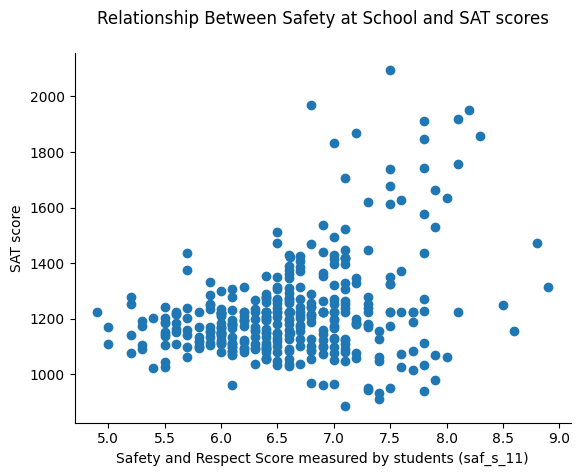

In [20]:
plt.scatter(combined['saf_s_11'], combined['sat_score'])
sns.despine()
plt.xlabel('Safety and Respect Score measured by students (saf_s_11)')
plt.ylabel('SAT score')
plt.title('Relationship Between Safety at School and SAT scores\n', size = 12)

A correlation between SAT scores and safety, albeit a relatively weak one. It seems that some schools with exceptionally high SAT scores also have high safety scores, while schools with low safety scores tend to have lower SAT scores. Additionally, it appears that no school with a safety score below 6.5 has an average SAT score higher than approximately 1500.

In [21]:
# Compute the average safety score for each borough
combined.groupby(by=['boro']).agg({'saf_s_11':['mean'],'saf_t_11':['mean']})

,saf_s_11,saf_t_11
,mean,mean
boro,,
Bronx,6.606577,7.026882
Brooklyn,6.370755,6.985849
Manhattan,6.831370,7.287778
Queens,6.721875,7.365625
Staten Island,6.530000,7.210000


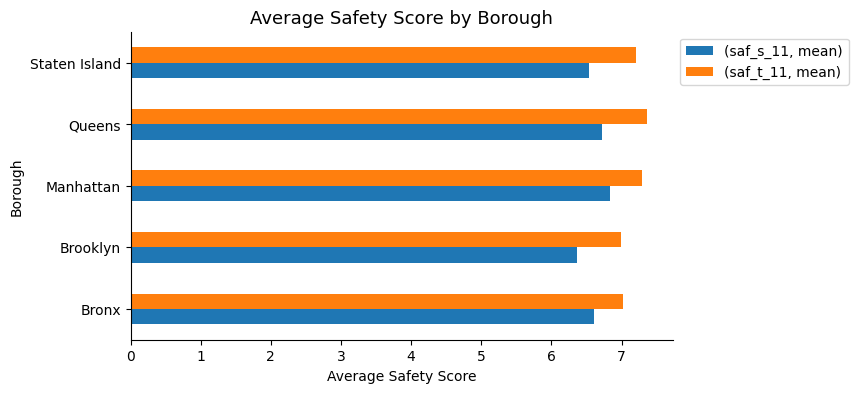

In [22]:
ax = combined.groupby('boro')[['saf_s_11','saf_t_11']].agg(['mean'])
ax.plot.barh(figsize = (7, 4))
sns.despine()
plt.xlabel('Average Safety Score')
plt.ylabel('Borough')
plt.title('Average Safety Score by Borough', size = 13)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

There appears to be a regional difference in safety scores among the boroughs. Manhattan and Queens tend to have higher safety scores, while Brooklyn has lower safety scores.

According to the observation teachers (saf_t_11) feel safer than students (saf_s_11) in the same area. Teachers may have different experiences or perceptions of safety compared to students. They may have additional security measures or interactions with staff members that contribute to their sense of security. 

### <a id='19'></a>Exploring Race and SAT Scores
To examine the relationship between the percentage of races in high schools and SAT scores, we can explore the correlations between these variables. 

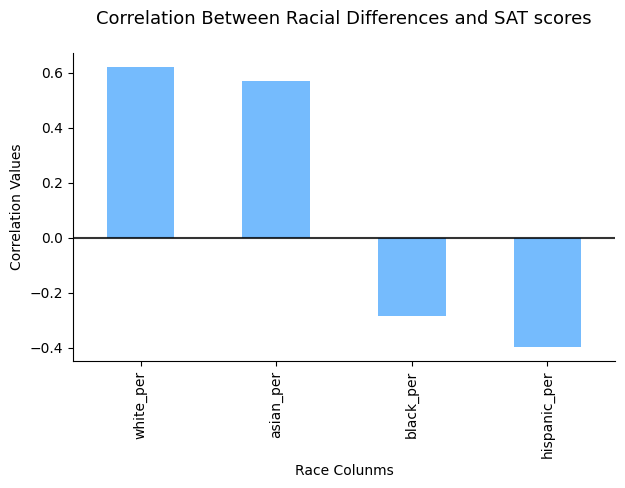

In [23]:
#Making a bar plot of the correlations between racial differences in SAT scores
list_of_race = ['white_per','asian_per','black_per','hispanic_per']
ax = combined.corr(numeric_only = True)['sat_score'][list_of_race]
ax.plot.bar(color = 'xkcd:sky blue',figsize = (7, 4))
sns.despine() #If no argument is passed in, by default, the top and right spines will be removed.
plt.axhline(y=0, color="black", linestyle="-",alpha = 0.8)
plt.xlabel('Race Colunms')
plt.ylabel('Correlation Values')
plt.title('Correlation Between Racial Differences and SAT scores\n', size = 13)
plt.show()

The bar plot above shows strong positive correlations for White and Asian race students and negative - for Black and Hispanic. It suggests that there may be an association between the percentage of students from these racial or ethnic groups in high schools and their respective SAT scores.

Let's explore the connection between SAT scores and the presence of Hispanic students in schools.

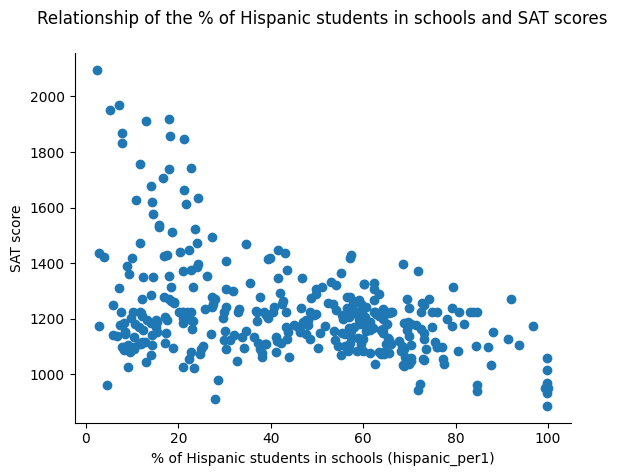

In [24]:
plt.scatter(combined['hispanic_per'], combined['sat_score'])
sns.despine()
plt.xlabel('% of Hispanic students in schools (hispanic_per1)')
plt.ylabel('SAT score')
plt.title('Relationship of the % of Hispanic students in schools and SAT scores\n', size = 12)
plt.show()

From the scatter plot above, it appears that there is a negative relationship between the percentage of Hispanic students in schools and SAT scores. As the percentage of Hispanic students increases, the scatter plot indicates a decrease in SAT scores on average.

Let's identify high schools where the proportion of Hispanic students surpasses 95% and the corresponding SAT scores are above 1100.

In [25]:
combined.loc[(combined['hispanic_per'] >=95)&(combined['sat_score'] >=1100),
             ['school_name', 'sat_score','hispanic_per','black_per','asian_per','white_per']]

,school_name,sat_score,hispanic_per,black_per,asian_per,white_per
82,Washington Heights Expeditionary Learning School,1174.0,96.7,2.3,0.0,0.3


As evident from the data, there exists only a single school that fulfills these specific criteria. This school is the Washington Heights Expeditionary Learning School, located at the northernmost point of Manhattan in New York City. The school accommodated a student body of 600 individuals, out of which 98% were of Hispanic and Latino origin. The majority of these students identified as Dominican American and/or were born in the Dominican Republic.

Let's examine high schools where the percentage of Hispanic students exceeds 95%. By focusing on these schools, we can gain insights into the specific characteristics and patterns associated with such a high concentration of Hispanic students.

In [26]:
combined.loc[(combined['hispanic_per'] >=95),
             ['school_name', 'boro','sat_score','hispanic_per','black_per',
              'asian_per','white_per']].sort_values(by=['sat_score'], ascending=False)

,school_name,boro,sat_score,hispanic_per,black_per,asian_per,white_per
82,Washington Heights Expeditionary Learning School,Manhattan,1174.0,96.7,2.3,0.0,0.3
44,Manhattan Bridges High School,Manhattan,1058.0,99.8,0.0,0.2,0.0
89,Gregorio Luperon High School for Science and M...,Manhattan,1014.0,99.8,0.0,0.0,0.0
176,Pan American International High School at Monroe,Bronx,970.0,99.8,0.0,0.0,0.0
125,Academy for Language and Technology,Bronx,951.0,99.4,0.6,0.0,0.0
286,Pan American International High School,Queens,951.0,100.0,0.0,0.0,0.0
141,International School for Liberal Arts,Bronx,934.0,99.8,0.0,0.2,0.0
253,Multicultural High School,Brooklyn,887.0,99.8,0.2,0.0,0.0


After conducting research on the schools, it was found that all of them cater to newly arrived immigrants or students who have been in the US for less than 3 years. A significant majority, approximately 76% of the students, are multilingual learners or Spanish-speaking students. These schools primarily aim to provide a smooth transition to English for the students. As a consequence of their focus on assisting non-native English speakers, it is evident that the SAT scores for these schools tend to be lower.

Let's find high schools where the percentage of Hispanic students is below 10% and the associated SAT scores exceed 1800.

In [27]:
combined.loc[(combined['hispanic_per'] <10) & (combined['sat_score'] >=1800),
             ['school_name', 'sat_score','hispanic_per','black_per',
            'asian_per','white_per']]

,school_name,sat_score,hispanic_per,black_per,asian_per,white_per
37,Stuyvesant High School,2096.0,2.4,1.2,72.1,23.7
151,Bronx High School of Science,1969.0,7.2,3.5,63.5,25.4
187,Brooklyn Technical High School,1833.0,7.9,10.2,60.3,21.3
327,Queens High School for the Sciences at York Co...,1868.0,7.9,10.5,74.4,6.7
356,Staten Island Technical High School,1953.0,5.3,1.1,31.8,61.3


All five schools are prestigious New York City public high schools known for their high level of competitiveness. They offer a demanding and challenging preparatory curriculum with a strong emphasis on specific subjects. Remarkably, none of these schools have multilingual learners, and a significant portion, up to 83%, of their student population is of Asian descent and known for their competitive spirit.

To gain admission to these schools, students must pass the highly challenging Specialized High Schools Admissions Test (SHSAT). Due to their academic excellence and the high-caliber students they attract, the SAT scores of these schools range from 85% to 96% based on the current SAT scale score.

### <a id='20'></a>English learners by Districts

Based on the earlier analysis, it was evident that schools with an English learner population exceeding 70% tend to prioritize facilitating a smooth transition into English for students. Let's proceed to determine the count of schools with this characteristic in each district.

By performing aggregation based on districts, we gain the ability to comprehend the district-specific fluctuations of ell_percent, offering a coherent overview of how this metric varies from one district to another, rather than being overwhelmed by the intricacies of individual schools.

In [28]:
districts = combined.groupby(['school_dist', 'boro']).mean(numeric_only=True)
districts.reset_index(inplace=True)
print(districts.head())

  school_dist       boro  SAT Critical Reading Avg. Score  \
0          01  Manhattan                       441.833333   
1          02  Manhattan                       426.619092   
2          03  Manhattan                       428.529851   
3          04  Manhattan                       402.142857   
4          05  Manhattan                       427.159915   

   SAT Math Avg. Score  SAT Writing Avg. Score    sat_score  AP Test Takers   \
0           473.333333              439.333333  1354.500000       116.681090   
1           444.186256              424.832836  1295.638184       128.908454   
2           437.997512              426.915672  1293.443035       156.183494   
3           416.285714              405.714286  1224.142857       129.016484   
4           438.236674              419.666098  1285.062687        85.722527   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  Total Cohort  ...  \
0         173.019231                            135.800000     93.50000

Let's determine the borough with the highest number of English learner students.

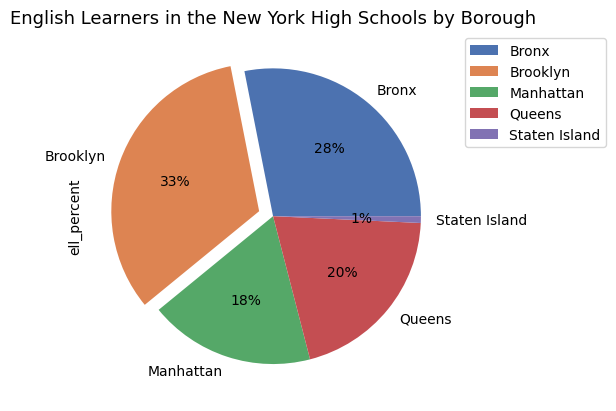

In [29]:
# define Seaborn color palette to use
palette_color = sns.color_palette('deep')

# declaring exploding pie
explode = [0, 0.1, 0, 0, 0]

districts.groupby(['boro']).sum().plot(
    kind='pie', y='ell_percent',colors=palette_color,explode=explode, autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('English Learners in the New York High Schools by Borough', size = 13)
plt.show()

The plot indicates that Brooklyn schools have the largest population of English learners.

### <a id='21'></a>Exploring Gender and SAT Scores

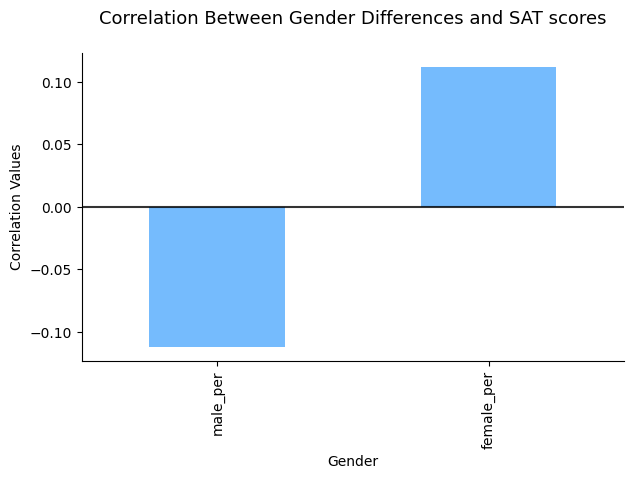

In [30]:
#Making a bar plot of the correlations between gender differences in SAT scores
gender = ['male_per','female_per']
ax = combined.corr(numeric_only = True)['sat_score'][gender]
ax.plot.bar(color = 'xkcd:sky blue',figsize = (7, 4))
sns.despine() #If no argument is passed in, by default, the top and right spines will be removed.
plt.axhline(y=0, color="black", linestyle="-",alpha = 0.8)
plt.xlabel('Gender')
plt.ylabel('Correlation Values')
plt.title('Correlation Between Gender Differences and SAT scores\n', size = 13)
plt.show()

The data reveals a weak association between the percentage of female and male students and their respective SAT scores. With correlation coefficients of 0.1 and -0.1, respectively, the relationships are minimal. This indicates that other factors likely have a more substantial impact on determining SAT scores for both genders.

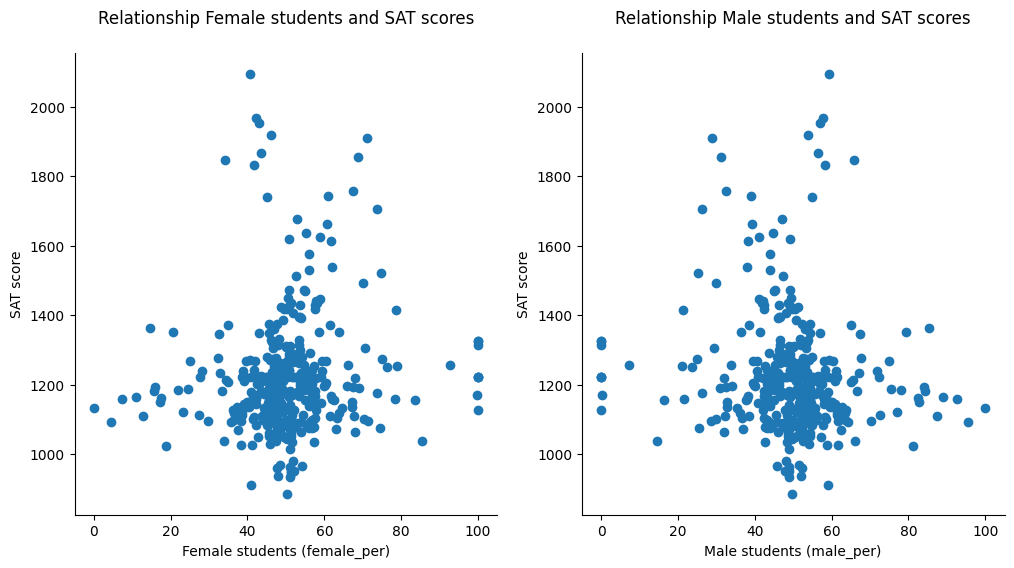

In [31]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(combined['female_per'], combined['sat_score'])
sns.despine()
plt.xlabel('Female students (female_per)')
plt.ylabel('SAT score')
plt.title('Relationship Female students and SAT scores\n', size = 12)

plt.subplot(122)
plt.scatter(combined['male_per'], combined['sat_score'])
sns.despine()
plt.xlabel('Male students (male_per)')
plt.ylabel('SAT score')
plt.title('Relationship Male students and SAT scores\n', size = 12)
plt.show()

After analyzing the scatterplot, it can be concluded that there is no significant correlation between sat_score and female_per, as well as sat_score and male_per.

After conducting a more detailed analysis, we observed a cluster of schools with relatively high percentages of female students and high SAT scores, as well as male students and high SAT scores. Several schools within this cluster have both female and male percentages exceeding 60% and their average SAT scores surpass 1700. These specific schools will be the focus of further investigation in the subsequent analysis.

In [32]:
# Finding racial differences in schools with females more than 60%
combined.loc[(combined['female_per'] >60) & (combined['sat_score'] >1700),
             ['school_name','boro', 'sat_score','hispanic_per','black_per',
              'asian_per','white_per']].sort_values(by=['sat_score'], ascending=False)

,school_name,boro,sat_score,hispanic_per,black_per,asian_per,white_per
302,Townsend Harris High School,Queens,1910.0,12.9,5.9,55.5,24.6
5,Bard High School Early College,Manhattan,1856.0,18.2,15.1,15.1,49.8
26,Eleanor Roosevelt High School,Manhattan,1758.0,11.6,5.5,17.2,63.7
60,Beacon High School,Manhattan,1744.0,22.8,14.6,8.9,49.8
61,Fiorello H. LaGuardia High School of Music & A...,Manhattan,1707.0,16.6,12.9,19.6,49.2


Research indicates that all five schools are highly-selective public high schools with unique academic admission criteria. Among them, only one school specializes in teaching visual arts and performing arts. The challenging and fast-paced curriculum has successfully attracted some of the city's most exceptional students.All these schools share a common objective of preparing their students for college.

In [33]:
# Finding racial differences in schools with males more than 60%
combined.loc[(combined['male_per'] >60) & (combined['sat_score'] >1700),
             ['school_name','boro', 'sat_score','hispanic_per','black_per','asian_per','white_per']]

,school_name,boro,sat_score,hispanic_per,black_per,asian_per,white_per
79,"High School for Mathematics, Science and Engin...",Manhattan,1847.0,21.2,15.0,36.2,26.1


The High School for Math, Science, and Engineering (HSMSE), situated in New York City has a specialized emphasis on engineering and design, which tends to attract a higher proportion of male students.  It serves exceptionally talented students from all corners of the city. The school was originally intended to be a smaller institution, accommodating around four hundred students. Admittance is determined based on test scores, with seats being filled starting from the highest scores.

Based on the findings above, it becomes evident that in both scenarios where a school has either more than 60% male or female students, the highest SAT scores are associated with schools having a significant Asian student population. This observation supports the theory that Asian students are often associated with a competitive spirit, which likely contributes to their academic success as reflected in their top performance in the SAT exams.

### <a id='19'></a>Exploring AP Scores vs. SAT Scores

In the United States, high school students often take Advanced Placement (AP) exams to earn college credit in various subjects. It is reasonable to assume that the number of students at a school who took AP exams would be closely related to the school's SAT scores. To avoid biased results, we will focus on examining the percentage of students in each school who have taken at least one AP exam, rather than solely relying on total enrollment as an indicator of performance.

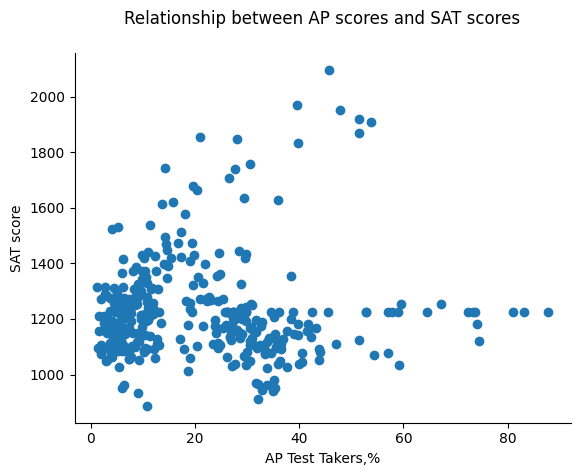

In [34]:
#Calculating the percentage of students in each school that took an AP exam
combined['ap_per'] = combined['AP Test Takers ']*100 / combined['total_enrollment']

#Let's investigate the relationship between AP scores and SAT scores by making a scatter plot
plt.scatter(combined['ap_per'], combined['sat_score'])
sns.despine()
plt.xlabel('AP Test Takers,%')
plt.ylabel('SAT score')
plt.title('Relationship between AP scores and SAT scores\n', size = 12)
plt.show()


Based on the plot provided, there is no significant correlation between AP scores and SAT scores.

Let's find out how many schools are responding to 3 criterias:
 - AP test takers >= 50% and SAT score > 1800
 - AP test takers < 50% and SAT average score (between 1100 & 1800)
 - AP test takers < 50% and SAT score > 1800

In [35]:
# Schools with high percentage of students,>=50%, taking AP exam
combined.loc[(combined['sat_score'] >=1800) &(combined["ap_per"] >= 50),
             ['school_name','boro', 'sat_score','hispanic_per','black_per','asian_per','white_per','ell_percent']]

,school_name,boro,sat_score,hispanic_per,black_per,asian_per,white_per,ell_percent
155,High School of American Studies at Lehman College,Bronx,1920.0,18.0,10.6,16.7,53.8,0.0
302,Townsend Harris High School,Queens,1910.0,12.9,5.9,55.5,24.6,0.0
327,Queens High School for the Sciences at York Co...,Queens,1868.0,7.9,10.5,74.4,6.7,0.2


Each of the three high schools functions within the premises of either a university or a college, providing students with a range of AP classes and opportunities to take college courses, and the amenities typical of a college campus. Admission to these schools mandates a specific points threshold, resulting in a highly competitive student body.

In [36]:
# Schools with percentage of students < 50% taking AP exam and SAT average score
average_sat_res_schools = combined.loc[(combined['sat_score'] >=1100)&(combined['sat_score'] <1800) 
             &(combined["ap_per"] <50),
             ['school_name','boro', 'sat_score','hispanic_per',
              'black_per','asian_per','white_per','ell_percent']].sort_values(by=['sat_score'], ascending=False)
average_sat_res_schools

,school_name,boro,sat_score,hispanic_per,black_per,asian_per,white_per,ell_percent
26,Eleanor Roosevelt High School,Manhattan,1758.0,11.6,5.5,17.2,63.7,0.2
60,Beacon High School,Manhattan,1744.0,22.8,14.6,8.9,49.8,0.2
198,"Brooklyn Latin School, The",Brooklyn,1740.0,17.9,26.7,36.8,14.5,0.4
61,Fiorello H. LaGuardia High School of Music & A...,Manhattan,1707.0,16.6,12.9,19.6,49.2,0.2
24,N.Y.C. Lab School for Collaborative Studies,Manhattan,1677.0,14.0,8.5,29.4,45.9,1.6
...,...,...,...,...,...,...,...,...
97,Bronx Leadership Academy II High School,Bronx,1103.0,56.0,41.2,1.4,1.0,14.1
86,High School for Law and Public Service,Manhattan,1102.0,84.4,13.0,1.0,1.3,32.0
174,East Bronx Academy for the Future,Bronx,1102.0,68.3,29.4,1.9,0.2,11.6
258,W. H. Maxwell Career and Technical Education H...,Brooklyn,1102.0,25.4,71.9,0.5,0.7,5.3


In [37]:
# Schools with percentage of students < 50%, taking AP exam and SAT score >1800
combined.loc[(combined['sat_score'] >1800) 
             &(combined["ap_per"] <50),
             ['school_name','boro', 'sat_score','hispanic_per',
              'black_per','asian_per','white_per']].sort_values(by=['sat_score'], ascending=False)

,school_name,boro,sat_score,hispanic_per,black_per,asian_per,white_per
37,Stuyvesant High School,Manhattan,2096.0,2.4,1.2,72.1,23.7
151,Bronx High School of Science,Bronx,1969.0,7.2,3.5,63.5,25.4
356,Staten Island Technical High School,Staten Island,1953.0,5.3,1.1,31.8,61.3
5,Bard High School Early College,Manhattan,1856.0,18.2,15.1,15.1,49.8
79,"High School for Mathematics, Science and Engin...",Manhattan,1847.0,21.2,15.0,36.2,26.1
187,Brooklyn Technical High School,Brooklyn,1833.0,7.9,10.2,60.3,21.3


The majority of these educational institutions are specialized high schools situated within New York City, focusing on particular academic disciplines. Prospective students are required to either fulfill all necessary criteria or successfully complete the Specialized High Schools Admissions Test. As a result, these schools draw in some of the most exceptional students from the city. Furthermore, even if a student participates in fewer than half of the available AP exams, their SAT scores are anticipated to remain notably high.

In [38]:
# Calculating quantity of schools with average SAT score by boro
average_sat_hs = average_sat_res_schools[["boro",'school_name']].groupby('boro').count()
average_sat_hs

,school_name
boro,
Bronx,59
Brooklyn,74
Manhattan,68
Queens,55
Staten Island,9


In [39]:
# Counting quantity of high schools per borough
boro_hs_total = combined[["DBN","boro"]].groupby('boro').count()
boro_hs_total

,DBN
boro,
Bronx,93
Brooklyn,106
Manhattan,90
Queens,64
Staten Island,10


In [40]:
# Counting total quantity of high schools in New York
hs_total = combined[["DBN","boro"]].groupby('boro').count().sum()
hs_total

DBN    363
dtype: int64

In [41]:
# Percentage of schools having average SAT score by boro
percentage = average_sat_hs['school_name'] *100/boro_hs_total['DBN']
percentage.round(1).sort_values(ascending=False)

boro
Staten Island    90.0
Queens           85.9
Manhattan        75.6
Brooklyn         69.8
Bronx            63.4
dtype: float64

In [42]:
# Percentage of schools having average SAT score within all of the New York's high schools
percentage = average_sat_hs['school_name'] *100/hs_total['DBN']
percentage.round(1).sort_values(ascending=False)

boro
Brooklyn         20.4
Manhattan        18.7
Bronx            16.3
Queens           15.2
Staten Island     2.5
Name: school_name, dtype: float64

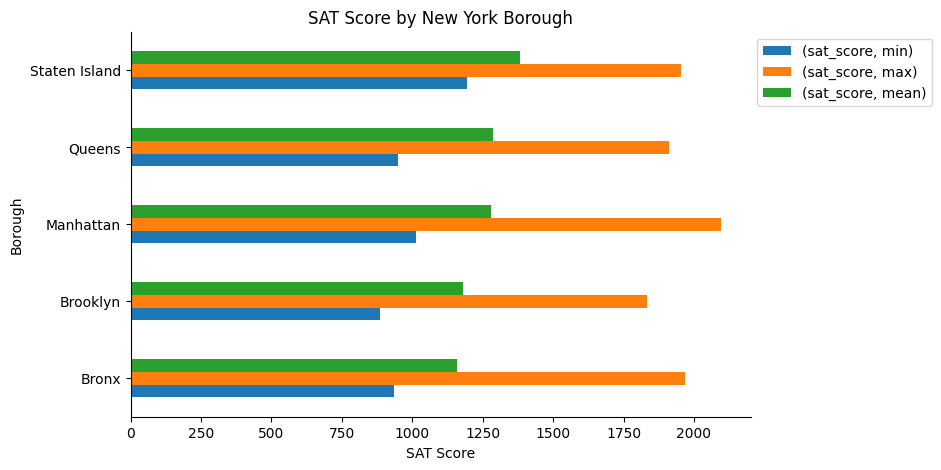

In [43]:
combined.groupby('boro')[['sat_score']].agg(['min','max','mean']).plot.barh(figsize=(8,5))
sns.despine()
plt.xlabel("SAT Score")
plt.ylabel("Borough")
plt.title("SAT Score by New York Borough")
plt.legend(bbox_to_anchor=(1.0, 1.0)) 
plt.show();

Here are some key insights drawn from the analysis:

 - Specialized high schools with specific admission criteria predominantly account for the high SAT scores in each borough.
 - Staten Island stands out with 90% of its high schools reporting an average SAT score falling between 1100 and 1800, a percentage significantly higher compared to the city's total of 363 high schools, where it represents only 2.5%. This stark contrast is primarily attributed to Staten Island's relatively small high school count, with 9 out of 10 high schools in the borough falling within the mentioned SAT score range. Queens and Manhattan follow as the second and third boroughs with similar characteristics.
 - When considering the maximum SAT scores achieved by high school students, Manhattan takes the lead, followed by Staten Island, with the Bronx coming in third.

### <a id='21'></a>Exploring Class Size vs SAT Score

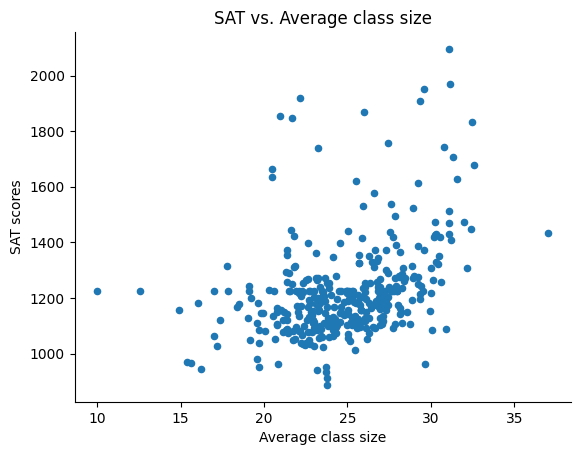

In [44]:
# Making a bar plot of the correlations between class size and SAT scores
combined.plot(kind= 'scatter', x ='AVERAGE CLASS SIZE', y ='sat_score')
sns.despine() #If no argument is passed in, by default, the top and right spines will be removed.
plt.title('SAT vs. Average class size')
plt.xlabel('Average class size')
plt.ylabel('SAT scores')
plt.show()

In [45]:
corr = combined['AVERAGE CLASS SIZE'].corr(combined['sat_score'])
print ("Pearson coefficient (r): Correlation between Average class size and SAT score is: ",round(corr, 2))

Pearson coefficient (r): Correlation between Average class size and SAT score is:  0.38


A correlation coefficient of 0.38 between a School's average class size and its average SAT score indicates a positive correlation between these two variables. However, the correlation is not very strong, as the coefficient is less than 1.

The value of 0.38 suggests that as the average class size increases, the average SAT score tends to increase, but the relationship is not highly linear. In other words, there is some tendency for larger class sizes to be associated with higher SAT scores, but other factors may also influence the SAT scores, and the relationship is not very strong or straightforward.

## <a id='22'></a>Conclusion

Wrapping up the analysis :

- There exists a correlation between SAT scores and safety, however a relatively weak one. Notably, teachers tend to feel safer than students within the same area. Boroughs like Manhattan and Queens typically report higher safety scores, while Brooklyn tends to have lower safety scores.
- Schools with a high percentage of English learners tend to exhibit lower SAT scores, as they prioritize transitioning these students into English proficiency. Brooklyn schools, in particular, house the largest population of English learners.
- Each borough boasts at least one specialized high school with specific admission criteria. Remarkably, these schools do not have multilingual learners, and a significant majority, as high as 83%, of the student population in some of these schools comprises Asian students who are renowned for their strong competitive spirit.
- Gender does not display a significant correlation with SAT scores. A more detailed analysis reveals clusters of schools with relatively high percentages of both female and male students achieving high SAT scores. These clusters are often linked to specialized schools focusing on specific academic disciplines such as music & art or STEM, which attract more female and male students respectively.
- There is no significant correlation between AP scores and SAT scores. Among the 363 high schools in New York, 265 fall within the range of an average SAT score between 1100 and 1800, constituting 73% of schools with strong academic performance. Living in Staten Island provides a 90% chance of enrolling your child in a high school with an SAT score within this range.
- The relationship between a school's average class size and its average SAT score is positive but nonlinear, indicating that it is not particularly strong.


###### [back to the top](#top_1)